<a href="https://colab.research.google.com/github/ngoan22mse23088/GraduationThesis/blob/master/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face recognition

https://github.com/ageitgey/face_recognition

In [11]:
!pip3 install face_recognition

Make known and unknown directories

In [12]:
!mkdir known unknown

mkdir: cannot create directory ‘known’: File exists
mkdir: cannot create directory ‘unknown’: File exists


Now upload your images (left click on files, import into the right folders)

* Base models in known with name as file name
* Pictures of these people in unknown

In [13]:
from PIL import Image, ImageDraw
import face_recognition
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import face_recognition

In [23]:
def draw_rec(url1, url2, url3):
  # This is an example of running face recognition on a single image
  # and drawing a box around each person that was identified.

  # Load a sample picture and learn how to recognize it.
  obama_image = face_recognition.load_image_file(url1)
  obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

  # Load a second sample picture and learn how to recognize it.
  biden_image = face_recognition.load_image_file(url2)
  biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

  # Create arrays of known face encodings and their names
  known_face_encodings = [
      obama_face_encoding,
      biden_face_encoding
  ]
  known_face_names = [
      "Donald Trump",
      "Kim"
  ]

  # Load an image with an unknown face
  unknown_image = face_recognition.load_image_file(url3)

  # Find all the faces and face encodings in the unknown image
  face_locations = face_recognition.face_locations(unknown_image)
  face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

  # Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
  # See http://pillow.readthedocs.io/ for more about PIL/Pillow
  pil_image = Image.fromarray(unknown_image)
  # Create a Pillow ImageDraw Draw instance to draw with
  draw = ImageDraw.Draw(pil_image)

  # Loop through each face found in the unknown image
  for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
      # See if the face is a match for the known face(s)
      matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

      name = "Unknown"

      # If a match was found in known_face_encodings, just use the first one.
      if True in matches:
          first_match_index = matches.index(True)
          name = known_face_names[first_match_index]

      # Draw a box around the face using the Pillow module
      draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

      # Draw a label with a name below the face
      text_width, text_height = draw.textsize(name)
      draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
      draw.text((left + 45, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


  # Remove the drawing library from memory as per the Pillow docs
  del draw

  # Display the resulting image
  plt.imshow(pil_image, aspect='auto')

  # You can also save a copy of the new image to disk if you want by uncommenting this line
  # pil_image.save("image_with_boxes.jpg")

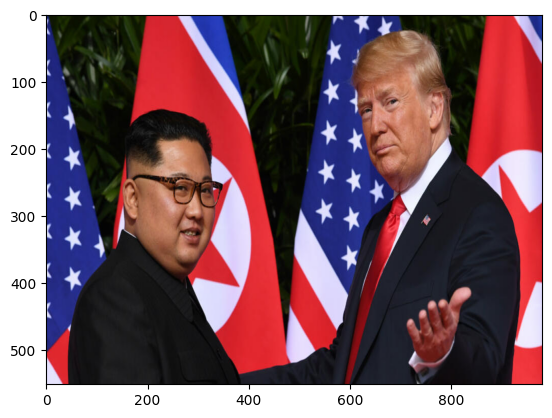

In [21]:
plt.imshow(Image.fromarray(face_recognition.load_image_file("unknown/kim_and_trump.jpg")), aspect='auto')

<ipython-input-23-1885c9eca4cc>:52: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-23-1885c9eca4cc>:52: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)


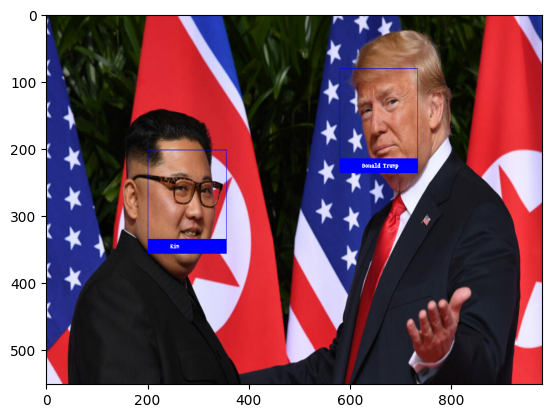

In [24]:
draw_rec("known/Donald Trump.jpg", "known/Kim.jpg", "unknown/kim_and_trump.jpg")